In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [3]:
import pandas as pd
from google.oauth2 import service_account


service_account_json_path = 'swift-terra-405619-f5f3188f542f.json'


credentials = service_account.Credentials.from_service_account_file(service_account_json_path)
project_id = credentials.project_id
query_config = {
    'query': {
        'use_legacy_sql': False,
    }
}


query = """
SELECT * FROM `swift-terra-405619.FC24_PLAYER_RATINGS2.fc24_upload` ORDER BY Rank ASC
"""




In [4]:
fc24 = pd.read_gbq(query, project_id=project_id, credentials=credentials, configuration=query_config)


In [4]:
fc24.head()

,Positioning,Rank,Player_Name,OVR,PAC,SHO,PAS,DR__,DEF,PHY,Position,Acceleration,Sprint_Speed,Finishing,Shot_Power,Long_Shots,Volleys,Penalties,Vision,Crossing,Free_Kick_Accuracy,Shot_Passing,Long_Passing,Curve,Agility,Balance,Reactions,Ball_Control,Detailed_Dribbling,Composure,Interception,Heading_Accuracy,Def_Awareness,Standing_Tackle,Sliding_Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Age_1,Foot,Height,League,Nation,Team,Weight
0,93,1,Kylian Mbappé,91,97,90,80,92,36,78,ST,97,97,94,90,83,84,84,83,78,69,86,71,80,93,82,93,92,93,88,38,73,26,34,32,88,88,77,64,24,High,Low,24,Right,18,Ligue 1 Uber Eats,France,Paris SG,75
1,91,2,Alexia Putellas,91,82,90,91,92,72,78,CM,81,82,91,86,89,90,91,91,88,89,94,91,89,90,89,92,94,92,92,78,74,60,81,64,84,85,78,70,29,High,Medium,29,Left,17,Liga F,Spain,FC Barcelona,67
2,96,3,Erling Haaland,91,89,93,66,80,45,88,ST,82,94,96,94,86,90,84,74,47,62,77,53,77,76,72,94,82,79,87,43,83,38,47,29,93,76,93,87,23,High,Medium,23,Left,19,Premier League,Norway,Manchester City,94
3,88,4,Kevin De Bruyne,91,72,88,94,87,65,78,CM,72,72,85,92,92,83,83,95,95,83,94,94,92,74,78,92,92,86,88,66,55,66,70,53,72,88,74,75,32,High,Medium,32,Right,18,Premier League,Belgium,Manchester City,75
4,91,5,Aitana Bonmatí,90,81,84,83,91,75,73,CM,82,80,91,69,89,62,70,90,67,67,91,87,76,93,86,91,91,91,85,88,54,70,81,67,75,80,75,60,25,High,High,25,Right,16,Liga F,Spain,FC Barcelona,51


In [5]:
dropped_columns = ["Rank","Player_Name", "PAC","SHO","PAS","DR__","DEF","PHY","Age_1","Height","League","Nation","Team","Weight","OVR"]
fc24.drop(dropped_columns,inplace=True,axis=1)

In [6]:
fc24.head()

,Positioning,Position,Acceleration,Sprint_Speed,Finishing,Shot_Power,Long_Shots,Volleys,Penalties,Vision,...,Standing_Tackle,Sliding_Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Foot
0,93,ST,97,97,94,90,83,84,84,83,...,34,32,88,88,77,64,24,High,Low,Right
1,91,CM,81,82,91,86,89,90,91,91,...,81,64,84,85,78,70,29,High,Medium,Left
2,96,ST,82,94,96,94,86,90,84,74,...,47,29,93,76,93,87,23,High,Medium,Left
3,88,CM,72,72,85,92,92,83,83,95,...,70,53,72,88,74,75,32,High,Medium,Right
4,91,CM,82,80,91,69,89,62,70,90,...,81,67,75,80,75,60,25,High,High,Right


In [7]:

pozisyon_kategori = {
    'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],
    'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],
    'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],
    'Kale': ['GK']
}


fc24['Kategori'] = fc24['Position'].apply(lambda x: next((kategori for kategori, pozisyonlar in pozisyon_kategori.items() if x in pozisyonlar), None))
fc24.drop(["Position"],axis=1 , inplace=True)
fc24.head()

,Positioning,Acceleration,Sprint_Speed,Finishing,Shot_Power,Long_Shots,Volleys,Penalties,Vision,Crossing,...,Sliding_Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Foot,Kategori
0,93,97,97,94,90,83,84,84,83,78,...,32,88,88,77,64,24,High,Low,Right,Hücum Hattı
1,91,81,82,91,86,89,90,91,91,88,...,64,84,85,78,70,29,High,Medium,Left,Orta Saha
2,96,82,94,96,94,86,90,84,74,47,...,29,93,76,93,87,23,High,Medium,Left,Hücum Hattı
3,88,72,72,85,92,92,83,83,95,95,...,53,72,88,74,75,32,High,Medium,Right,Orta Saha
4,91,82,80,91,69,89,62,70,90,67,...,67,75,80,75,60,25,High,High,Right,Orta Saha


In [8]:
priority_order = ['Low','Medium','High']


def custom_label_encoding(value):
    return priority_order.index(value)


fc24['Att_Work_Rate'] = fc24['Att_Work_Rate'].apply(lambda x: custom_label_encoding(x) if x in priority_order else x)


fc24['Att_Work_Rate'].head(10)

0    2
1    2
2    2
3    2
4    2
5    0
6    2
7    1
8    1
9    1
Name: Att_Work_Rate, dtype: int64

In [9]:
priority_order = ['Low','Medium','High']

def custom_label_encoding(value):
    return priority_order.index(value)

fc24['Def_Work_Rate'] = fc24['Def_Work_Rate'].apply(lambda x: custom_label_encoding(x) if x in priority_order else x)

fc24['Def_Work_Rate'].head()

0    0
1    1
2    1
3    1
4    2
Name: Def_Work_Rate, dtype: int64

In [13]:
label_encoder = LabelEncoder()
fc24['Kategori'] = label_encoder.fit_transform(fc24["Kategori"])
fc24["Kategori"].head(10)

#Bilgilendirme:
"""
Pozisyon Kategori'lerinin Encoding Karşılığı

'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],     = 0
'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],        = 1
'Kale': ['GK']                                  = 2
'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],  = 3

"""

"\nPozisyon Kategori'lerinin Encoding Karşılığı\n\n'Defans': ['CB', 'LB', 'RB', 'LWB', 'RWB'],     = 0\n'Hücum Hattı': ['CF', 'ST', 'LW', 'RW'],        = 1\n'Kale': ['GK']                                  = 2\n'Orta Saha': ['CAM', 'CDM', 'CM', 'LM', 'RM'],  = 3\n\n"

In [14]:
label_encoder = LabelEncoder()
fc24['Foot'] = label_encoder.fit_transform(fc24["Foot"])
fc24["Foot"].head()

0    1
1    0
2    0
3    1
4    1
Name: Foot, dtype: int32

In [15]:
X = fc24.drop(["Kategori"],axis=1)
y = fc24["Kategori"]

In [17]:
X

,Positioning,Acceleration,Sprint_Speed,Finishing,Shot_Power,Long_Shots,Volleys,Penalties,Vision,Crossing,Free_Kick_Accuracy,Shot_Passing,Long_Passing,Curve,Agility,Balance,Reactions,Ball_Control,Detailed_Dribbling,Composure,Interception,Heading_Accuracy,Def_Awareness,Standing_Tackle,Sliding_Tackle,Jumping,Stamina,Strength,Aggression,Age,Att_Work_Rate,Def_Work_Rate,Foot
0,93,97,97,94,90,83,84,84,83,78,69,86,71,80,93,82,93,92,93,88,38,73,26,34,32,88,88,77,64,24,2,0,1
1,91,81,82,91,86,89,90,91,91,88,89,94,91,89,90,89,92,94,92,92,78,74,60,81,64,84,85,78,70,29,2,1,0
2,96,82,94,96,94,86,90,84,74,47,62,77,53,77,76,72,94,82,79,87,43,83,38,47,29,93,76,93,87,23,2,1,0
3,88,72,72,85,92,92,83,83,95,95,83,94,94,92,74,78,92,92,86,88,66,55,66,70,53,72,88,74,75,32,2,1,1
4,91,82,80,91,69,89,62,70,90,67,67,91,87,76,93,86,91,91,91,85,88,54,70,81,67,75,80,75,60,25,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17321,53,59,56,32,44,35,36,40,46,36,35,54,50,34,60,67,44,45,43,39,36,42,35,38,45,48,59,60,50,22,1,1,1
17322,43,70,66,49,44,41,37,61,42,32,34,44,31,31,57,69,49,44,42,40,12,41,11,13,19,40,54,46,34,19,1,0,1
17323,37,51,60,31,40,32,26,41,35,35,34,51,50,32,57,60,45,42,43,39,43,42,40,45,51,38,49,51,56,22,1,1,1
17324,46,63,62,40,49,38,36,36,45,41,36,52,50,34,53,71,44,46,46,41,37,46,34,46,45,43,58,45,50,22,2,1,1


In [18]:
y

0        1
1        3
2        1
3        3
4        3
        ..
17321    3
17322    1
17323    3
17324    3
17325    0
Name: Kategori, Length: 17326, dtype: int32

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.27105553,  0.20465194,  0.72308239, ..., -0.4155325 ,
        -0.18772292,  0.55879466],
       [-0.12411424,  0.40055018,  0.72308239, ...,  1.41339111,
        -0.18772292,  0.55879466],
       [-0.7168689 ,  0.33525076,  0.1931234 , ..., -0.4155325 ,
        -0.18772292,  0.55879466],
       ...,
       [ 1.70354596,  0.85764606,  0.78932726, ...,  1.41339111,
         1.77149374,  0.55879466],
       [ 0.71562152,  1.31474195,  1.38553112, ..., -0.4155325 ,
         1.77149374,  0.55879466],
       [-0.86505757,  0.07405311, -0.60181508, ..., -2.2444561 ,
        -0.18772292, -1.78956615]])

In [25]:
model_l2 = LogisticRegression(penalty='l2', random_state=42)
model_l2.fit(X_train_scaled, y_train)
y_pred_l2 = model_l2.predict(X_test_scaled)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("L2 Regularization Accuracy:", accuracy_l2)

L2 Regularization Accuracy: 0.8877668782458165


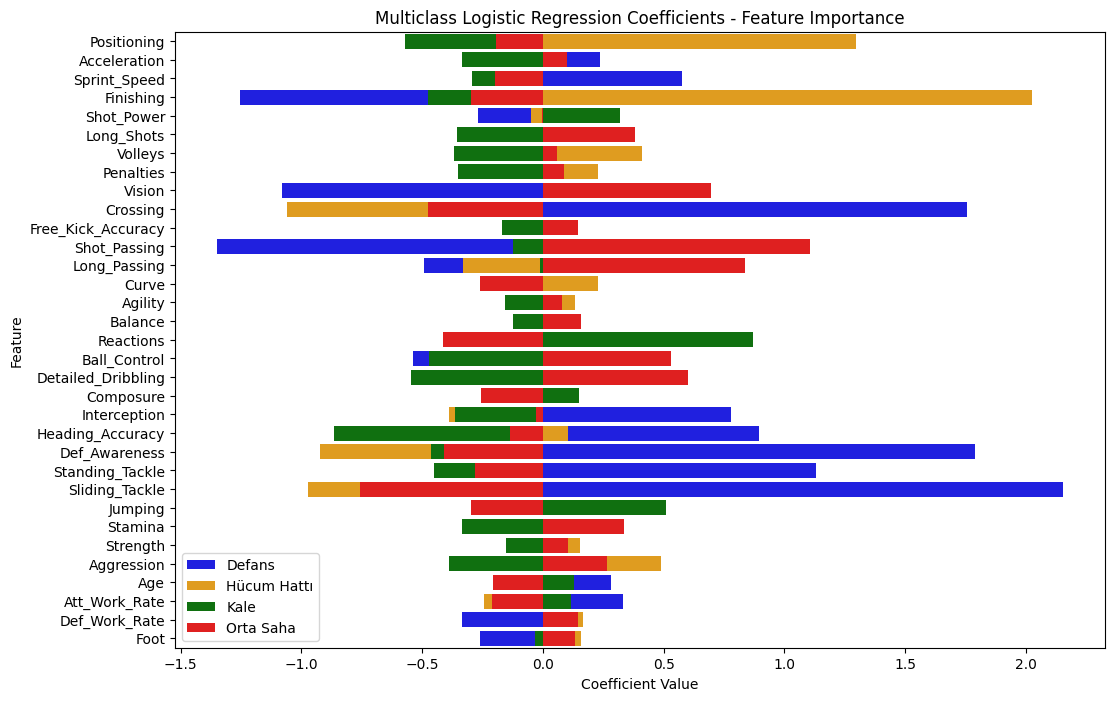

In [26]:
coefficients = model_l2.coef_
feature_names = X_train.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Defans': coefficients[0], 'Hücum Hattı': coefficients[1], 'Kale': coefficients[2], 'Orta Saha' : coefficients[3]})

# Grafikle göster
plt.figure(figsize=(12, 8))
sns.barplot(x='Defans', y='Feature', data=importances_df, color='blue', label='Defans')
sns.barplot(x='Hücum Hattı', y='Feature', data=importances_df, color='orange', label='Hücum Hattı')
sns.barplot(x='Kale', y='Feature', data=importances_df, color='green', label='Kale')
sns.barplot(x='Orta Saha', y='Feature', data=importances_df, color='red', label='Orta Saha')
plt.title('Multiclass Logistic Regression Coefficients - Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend()
plt.show()

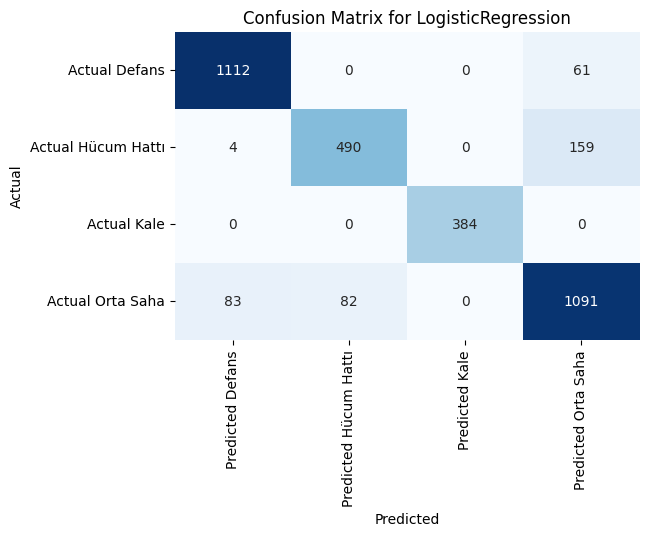

In [27]:
cm_l2 = confusion_matrix(y_test, y_pred_l2)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_l2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Defans", "Predicted Hücum Hattı", "Predicted Kale", "Predicted Orta Saha"],
            yticklabels=["Actual Defans", "Actual Hücum Hattı", "Actual Kale", "Actual Orta Saha"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for LogisticRegression")
plt.show()


In [ ]:
import pickle
pickle.dump(model_l2,open("logreg_l2_model.pkl","wb"))
